In [2]:
"""
Created on Thu Feb  8 17:15:03 2024
Modified on Thu Jun 19 14:41:03 2025

Code for reproducing statistics and generating graphs for Restrepo et al DPN

@author: chemarestrepo and modified and re-organized by madmaxpython
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


animal_df = pd.read_csv('path/to/data/data.csv')

animal_df = animal_df.astype({'Animal_ID':'category',
                              'CSDS':'category',
                              'SIR_Classification':'category'})





### Color palette

In [18]:
custom_palette_F_CSDS = {
        "Control": "#882255",
        "Stress": "#f1e302",
        }

custom_palette_M_CSDS = {
    "Control": "#332288",
    "Stress": "#88ccee"
}

custom_palette_F_SIR = {
    "Control": "#882255",
    "Resilient": "#ed7c14",
    "Susceptible": "#f1e302",
}
custom_palette_M_SIR = {
    "Control": "#332288",
    "Resilient": "#029542",
    "Susceptible": "#88ccee"
}

# Fig. 3A-D


In [22]:
def plot_grouped_box_strip(
    data: pd.DataFrame,
    x_data: str,
    y_data: str,
    hue: str,
    x_title: str = "",
    y_title: str = "",
    graph_title: str = "",
    colors: dict = None,
    figsize: tuple = (7, 7),
    showfliers: bool = False,
    show_strip: bool = True,
    jitter: float = 0.25,
    strip_size: int = 5,
    save_path: str = None
):
    """
    Plots a grouped boxplot with optional overlaid stripplot for data visualization.

    Parameters:
        data (pd.DataFrame): The data to plot.
        x_data (str): Column name for the x-axis (categorical).
        y_data (str): Column name for the y-axis (numerical).
        hue (str): Column name for the grouping variable.
        x_title (str): Label for the x-axis.
        y_title (str): Label for the y-axis.
        graph_title (str): Title of the graph.
        colors (dict): Dictionary mapping hue levels to colors.
        figsize (tuple): Figure size.
        showfliers (bool): Whether to show outliers in the boxplot.
        show_strip (bool): Whether to overlay stripplot (individual points).
        jitter (float): Jitter amount for stripplot.
        strip_size (int): Size of the stripplot markers.
        save_path (str): Path to save the figure (optional).
    """

    data_long = pd.melt(data, id_vars=['Animal_ID', hue],
                             value_vars=[f'{y_data}_Session1', f'{y_data}_Session2'],
                             var_name=x_data, value_name=y_data)

    data_long = data_long.astype({x_data:'category'})

    plt.style.use('default')
    fig, ax = plt.subplots(figsize=figsize)

    # Set color palette if provided
    if colors:
        sns.set_palette(sns.color_palette([colors.get(h, '#333333') for h in data[hue].unique()]))

    # Plot boxplot
    sns.boxplot(
        data=data_long,
        x=x_data,
        y=y_data,
        hue=hue,
        ax=ax,
        showfliers=showfliers
    )

    if show_strip:
        sns.stripplot(
            data=data_long,
            x=x_data,
            y=y_data,
            hue=hue,
            dodge=True,
            jitter=jitter,
            marker='o',
            color='white',
            edgecolor='black',
            linewidth=1,
            size=strip_size,
            ax=ax
        )

    # Title and labels
    ax.set_title(graph_title, fontsize=14)
    ax.set_xlabel(x_title, fontsize=12)
    ax.set_ylabel(y_title, fontsize=12)

    # Manage legend
    handles, labels = ax.get_legend_handles_labels()
    n_hue = data[hue].nunique()
    ax.legend(handles[:n_hue], labels[:n_hue], title=hue)

    sns.despine()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)

    plt.show()


### Exemple

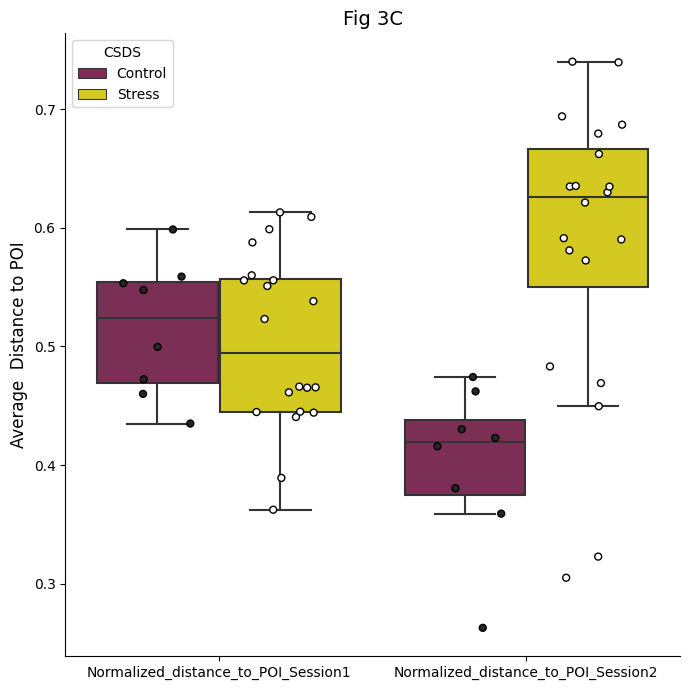

In [23]:
plot_grouped_box_strip(data= animal_df,
                       x_data= "Session",
                       y_data= "Normalized_distance_to_POI",
                       hue= "CSDS",
                       colors= custom_palette_F_CSDS,
                       y_title= "Average  Distance to POI",
                       graph_title= "Fig 3C",
                       )

# Fig 3E-G




In [27]:
def plot_SIR(
    data: pd.DataFrame,
    x_data: str,
    y_data: str,
    category_order: list,
    y_ticks: list = None,
    x_title: str = "",
    y_title: str = "",
    graph_title: str = "",
    figsize: tuple = (7, 7),
    showfliers: bool = False,
    show_strip: bool = True,
    jitter: float = 0.25,
    strip_size: int = 5,
    colors: dict = None,  # Now: dict of group -> hex color (e.g. "#1f77b4")
    save_path: str = None
):
    """
    Plots a boxplot with overlaid stripplot and optional y-axis tick control.

    Parameters:
        data (pd.DataFrame): The data to plot.
        x_data (str): Column name for the x-axis.
        y_data (str): Column name for the y-axis.
        category_order (list): Order of categories on the x-axis.
        y_ticks (list): Custom y-axis ticks.
        x_title (str): Label for the x-axis.
        y_title (str): Label for the y-axis.
        graph_title (str): Title of the graph.
        figsize (tuple): Size of the figure.
        showfliers (bool): Whether to show outliers in boxplot.
        show_strip (bool): Whether to add a stripplot overlay.
        jitter (float): Jitter amount for stripplot.
        strip_size (int): Size of the points in the stripplot.
        colors (dict): Dict mapping category -> hex color (e.g. "#1f77b4").
        save_path (str): Path to save the figure (optional).
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=figsize)

    # Build palette from colors dict
    if colors:
        palette = [colors.get(cat, "#333333") for cat in category_order]
        sns.set_palette(palette)

    # Boxplot
    sns.boxplot(
        data=data,
        x=x_data,
        y=y_data,
        order=category_order,
        showfliers=showfliers,
        ax=ax
    )

    # Optional stripplot
    if show_strip:
        sns.stripplot(
            data=data,
            x=x_data,
            y=y_data,
            order=category_order,
            dodge=True,
            jitter=jitter,
            marker='o',
            color='white',
            edgecolor='black',
            linewidth=1,
            size=strip_size,
            ax=ax
        )

    # Axis labels and ticks
    ax.set_xlabel(x_title, fontsize=12)
    ax.set_ylabel(y_title, fontsize=12)
    ax.set_title(graph_title, fontsize=14)

    if y_ticks:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([str(y) for y in y_ticks])

    sns.despine()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)

    plt.show()


### Exemple

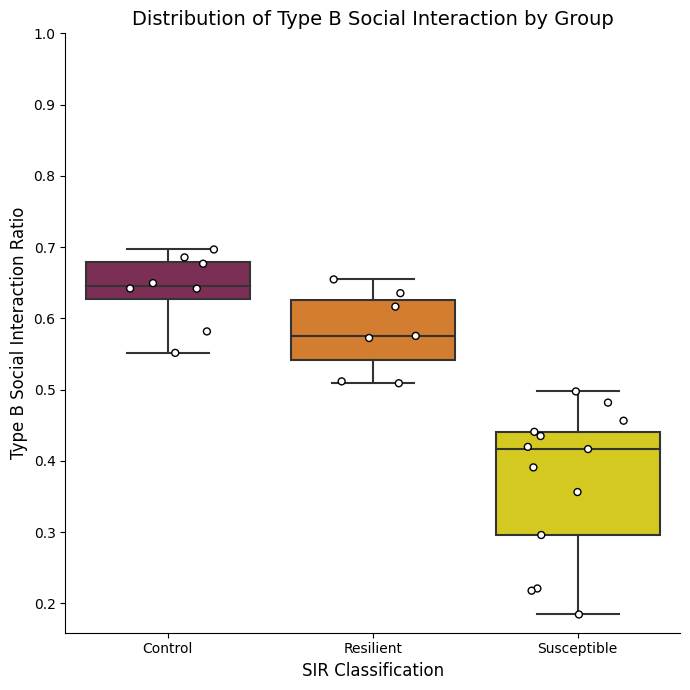

In [28]:
y_ticks = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plot_SIR(
    data=animal_df,
    x_data='SIR_Classification',
    y_data='SIR_typeB',
    category_order=['Control', 'Resilient', 'Susceptible'],
    y_ticks=y_ticks,
    x_title='SIR Classification',
    y_title='Time-based SIR_TypeB',
    graph_title='Distribution of Type B Social Interaction by Group',
    colors=custom_palette_F_SIR,  # Optional custom palette
    showfliers=False,
    show_strip=True,
    save_path='../../max_deepOF/figure3D.png'
)


# Fig 4

In [40]:
def plot_figure4(
    data: pd.DataFrame,
    x_data: str,
    y_data: str,
    x_title: str,
    y_title: str,
    hue: str,
    palette: dict,
    filename: str,
    output_dir: str,
    xlim: tuple=(0, 125),
    ylim: tuple=(0.2, 1),
    show_legend: bool=False,
    figsize: int=6,
    dot_size: int =80
):
    """
    Creates a joint KDE + scatterplot with marginal histograms.

    Parameters:
        data (pd.DataFrame): Data to plot.
        x_data (str): Column for x-axis.
        y_data (str): Column for y-axis.
        hue (str): Column for grouping variable.
        palette (dict): Mapping of group -> hex color.
        filename (str): Name of the saved file (without extension).
        output_dir (str): Folder where the figure will be saved.
        xlim (tuple): X-axis limits.
        ylim (tuple): Y-axis limits.
        show_legend (bool): Whether to keep the legend.
        figsize (int): Size of the jointplot (square).
        dot_size (int): Size of the scatterplot dots.
    """
    # Create output directory if needed
    os.makedirs(output_dir, exist_ok=True)

    # Create plot
    plot = sns.jointplot(
        data=data,
        x=x_data,
        y=y_data,
        hue=hue,
        palette=palette,
        marginal_kws=dict(common_norm=False, fill=True),
        joint_kws=dict(s=dot_size),
        height=figsize,
        space=0
    )

    # Make marginal KDE lines thinner
    for line in plot.ax_marg_x.lines + plot.ax_marg_y.lines:
        line.set_linewidth(1)

    # Axis limits
    plot.ax_joint.set_xlim(xlim)
    plot.ax_joint.set_ylim(ylim)

    # Remove grids
    plot.ax_joint.grid(False)
    plot.ax_marg_x.grid(False)
    plot.ax_marg_y.grid(False)

    # Ticks and spines
    plot.ax_joint.tick_params(
        axis='both',
        which='both',
        direction='out',
        length=8,
        width=1,
        color='black',
        bottom=True,
        top=True,
        left=True,
        right=True
    )
    for spine in plot.ax_joint.spines.values():
        spine.set_linewidth(1.5)

    # Legend
    if not show_legend and plot.ax_joint.get_legend():
        plot.ax_joint.get_legend().remove()

    # Axis labels
    plot.ax_joint.set_xlabel(x_title)
    plot.ax_joint.set_ylabel(y_title)

    # Save figure
    save_path = os.path.join(output_dir, f"{filename}.svg")
    plt.savefig(save_path, dpi=300)
    plt.show()


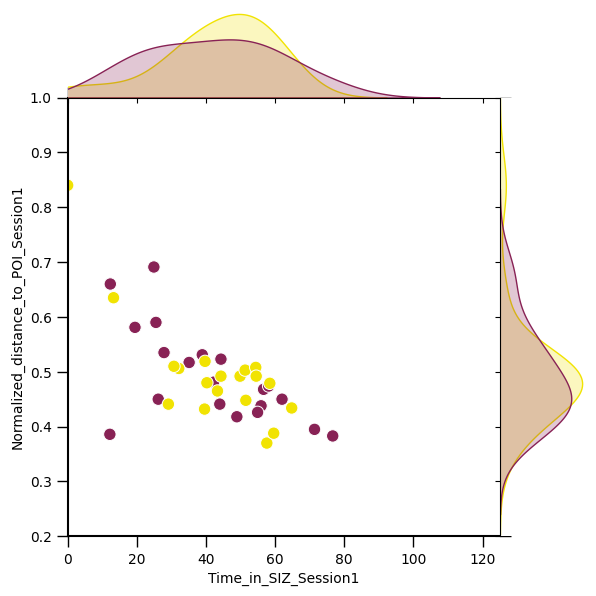

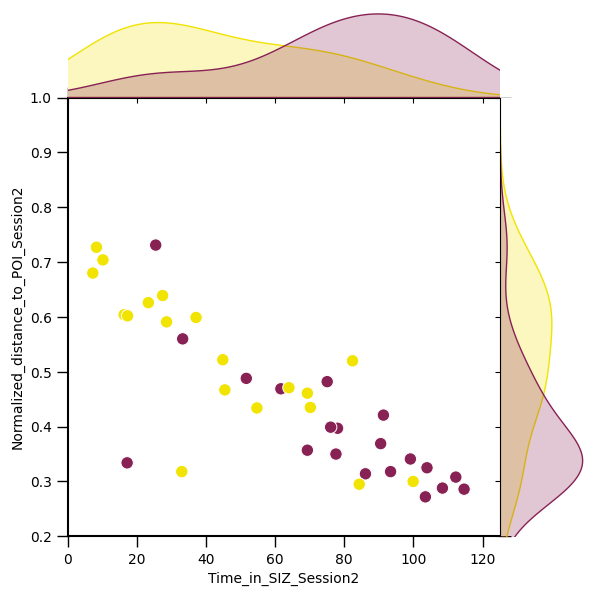

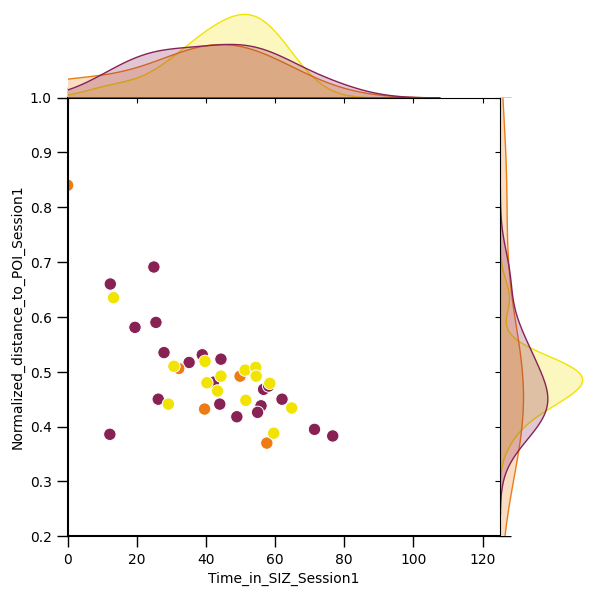

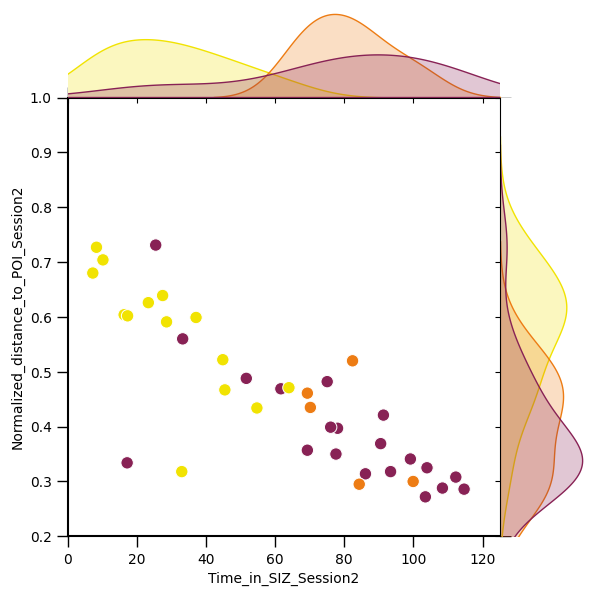

In [42]:
figure_to_plot = [
    ['Time_in_SIZ_Session1', 'Normalized_distance_to_POI_Session1',"CSDS", "Female_Fig_4B", custom_palette_F_CSDS],
    ['Time_in_SIZ_Session2', 'Normalized_distance_to_POI_Session2',"CSDS", "Female_Fig_4D", custom_palette_F_CSDS],
    ['Time_in_SIZ_Session1', 'Normalized_distance_to_POI_Session1', "SIR_Classification", "Female_Fig_4F", custom_palette_F_SIR],
    ['Time_in_SIZ_Session2', 'Normalized_distance_to_POI_Session2', "SIR_Classification", "Female_Fig_4H", custom_palette_F_SIR]
]


for fig in figure_to_plot:
    plot_figure4(
    data=animal_df,
    x_data=fig[0],
    y_data=fig[1],
    hue=fig[2],
    filename=fig[3],
    palette=fig[4],
    output_dir='/path/to/output/folder',
    xlim=(0, 125),
    ylim=(0.2, 1),
    show_legend=False,
    figsize=6,
    dot_size=80)




# Fig 5D

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.jointplot(
    data=animal_df,
    x='Index',
    y='Shred',
    hue='SIR_Classification',
    kind='scatter',
    palette=custom_palette_F_SIR,
    marginal_kws=dict(common_norm=False, fill=True),
    joint_kws=dict(s=80),
    height=6,
    space=0
)


sns.regplot(
    data=animal_df,
    x='Index',
    y='Shred',
    scatter=False,
    ax=plot.ax_joint,
    color='black',
    line_kws={'linewidth': 2},
    ci=0
)
plot.ax_joint.tick_params(
            axis='both',        # x and y
            which='both',       # major and minor
            direction='out',    # ticks point outward
            length=8,           # length of the ticks
            width=1,          # thickness
            color='black',      # tick color
            bottom=True,
            top=True,
            left=True,
            right=True
        )
for spine in plot.ax_joint.spines.values():
    spine.set_linewidth(1.5)

# Supprimer la légende si elle existe
if plot.ax_joint.get_legend():
    plot.ax_joint.get_legend().remove()

plot.ax_joint.set_xlim([0, 2])
plot.ax_joint.set_ylim([0, 6])

# 🔧 Supprimer la grille et s'assurer que les ticks sont visibles
plot.ax_joint.grid(False)
plot.ax_marg_x.grid(False)
plot.ax_marg_y.grid(False)

plt.savefig('/path/to/save/Fig_5D.svg', dpi=300)


### Spearman Correlation

In [5]:
import numpy as np
from scipy.stats import spearmanr

x = animal_df["Index"].to_numpy()
y = animal_df["Shred"].to_numpy()

corr, pval = spearmanr(x, y)

n_bootstraps = 5000
bootstrapped_corrs = []

rng = np.random.default_rng(seed=42)
for _ in range(n_bootstraps):
    indices = rng.integers(0, len(x), len(x))  # resample with replacement
    boot_x = x[indices]
    boot_y = y[indices]
    if len(np.unique(boot_x)) > 1 and len(np.unique(boot_y)) > 1:
        boot_corr, _ = spearmanr(boot_x, boot_y)
        bootstrapped_corrs.append(boot_corr)

ci_lower = np.percentile(bootstrapped_corrs, 2.5)
ci_upper = np.percentile(bootstrapped_corrs, 97.5)

print(f"Spearman rho = {corr:.4f}, 95% CI = [{ci_lower:.4f}, {ci_upper:.4f}], p = {pval:.4f}")



Spearman rho = 0.5165, 95% CI = [0.1219, 0.8098], p = 0.0049
